In [84]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rc
 
font = {'family': 'Droid Sans',
        'weight': 'normal'}
rc('font', **font)
%pylab inline


from pylab import rcParams
rcParams['figure.figsize'] = 13, 13

Populating the interactive namespace from numpy and matplotlib


/home/sak/anaconda3/lib/python3.5/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['rc']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [85]:
data=pd.read_csv('data-20170129T2324-structure-20170129T2324.csv')
data.head(3)

,number,date,drugname,orgname,country,attractedorg,startdate,enddate,protocolnumber,phase,type,orgamount,patamount,areas,status
0,544,28.09.2015,Леналидомид,Лаборатория Тютор С.А.С.И.Ф.И.А,Аргентина,"ООО ""РегЭксперт"", 123458, г. Москва, ул. Марша...",28.09.2015,30.12.2016,R/0115-4,Биоэквивалентность,РКИ,1,26,Онкология;,Проводится
1,543,28.09.2015,Метформин МВ (метформин),"ООО ""Изварино Фарма""",Россия,"ООО ""Медицинский Центр Пробиотек"", 119992, г. ...",28.09.2015,01.02.2017,Протокол № 10042015-MfLIz-001 Версия 1.0 от 10...,Биоэквивалентность,КИ,1,47,Диабетология;,Проводится
2,542,28.09.2015,Сульфалонг® (Дисульфирам),ООО «Российская наркологическая лига»,Россия,"ООО «Российская наркологическая лига», 129515,...",01.10.2015,31.08.2016,ИД-III-01-023,III,КИ,1,80,Другое;,Проводится


In [87]:
data.describe(include=['object', 'bool']).T

,count,unique,top,freq
date,509,163,24.08.2015,15
drugname,509,468,MPDL3280A (RO5541267),6
orgname,509,289,"ООО ""Атолл""",20
country,509,38,Россия,212
attractedorg,509,210,"Квинтайлс ГезмбХ, 125167, г. Москва, Ленинград...",21
startdate,509,167,01.09.2015,22
enddate,509,193,31.12.2015,53
protocolnumber,509,506,42005,2
phase,509,12,III,212
type,509,4,РКИ,235


In [88]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 509 entries, 0 to 508
Data columns (total 15 columns):
number            509 non-null int64
date              509 non-null object
drugname          509 non-null object
orgname           509 non-null object
country           509 non-null object
attractedorg      509 non-null object
startdate         509 non-null object
enddate           509 non-null object
protocolnumber    509 non-null object
phase             509 non-null object
type              509 non-null object
orgamount         509 non-null int64
patamount         509 non-null int64
areas             509 non-null object
status            509 non-null object
dtypes: int64(3), object(12)
memory usage: 59.7+ KB


In [89]:
for cntr in range(len(data.country)):
    if data.country[cntr]=='Соединенные Штаты Америки':
        data.country[cntr]='США'
pd.unique(data.country)

/home/sak/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


array(['Аргентина', 'Россия', 'США', 'Венгрия', 'Австрия', 'Словения',
       'Испания', 'Швейцария', 'Швеция', 'Великобритания', 'Германия',
       'Франция', 'Италия', 'Бельгия', 'Индия', 'Республика Хорватия',
       'Республика Корея', 'Дания', 'Финляндия', 'Израиль', 'Нидерланды',
       'Панама', 'Вьетнам', 'Кипр', 'Турция', 'Республика Польша',
       'Ирландия', 'россия', 'Республика Беларусь', 'Украина', 'Япония',
       'Сингапур', 'Греция', 'Румыния', 'Эстония', 'США и Россия',
       'Южная Корея'], dtype=object)

In [90]:
data['nms_attractedorg']= [ x.split(',')[0] for x in data.attractedorg]



(29.5, -0.5)

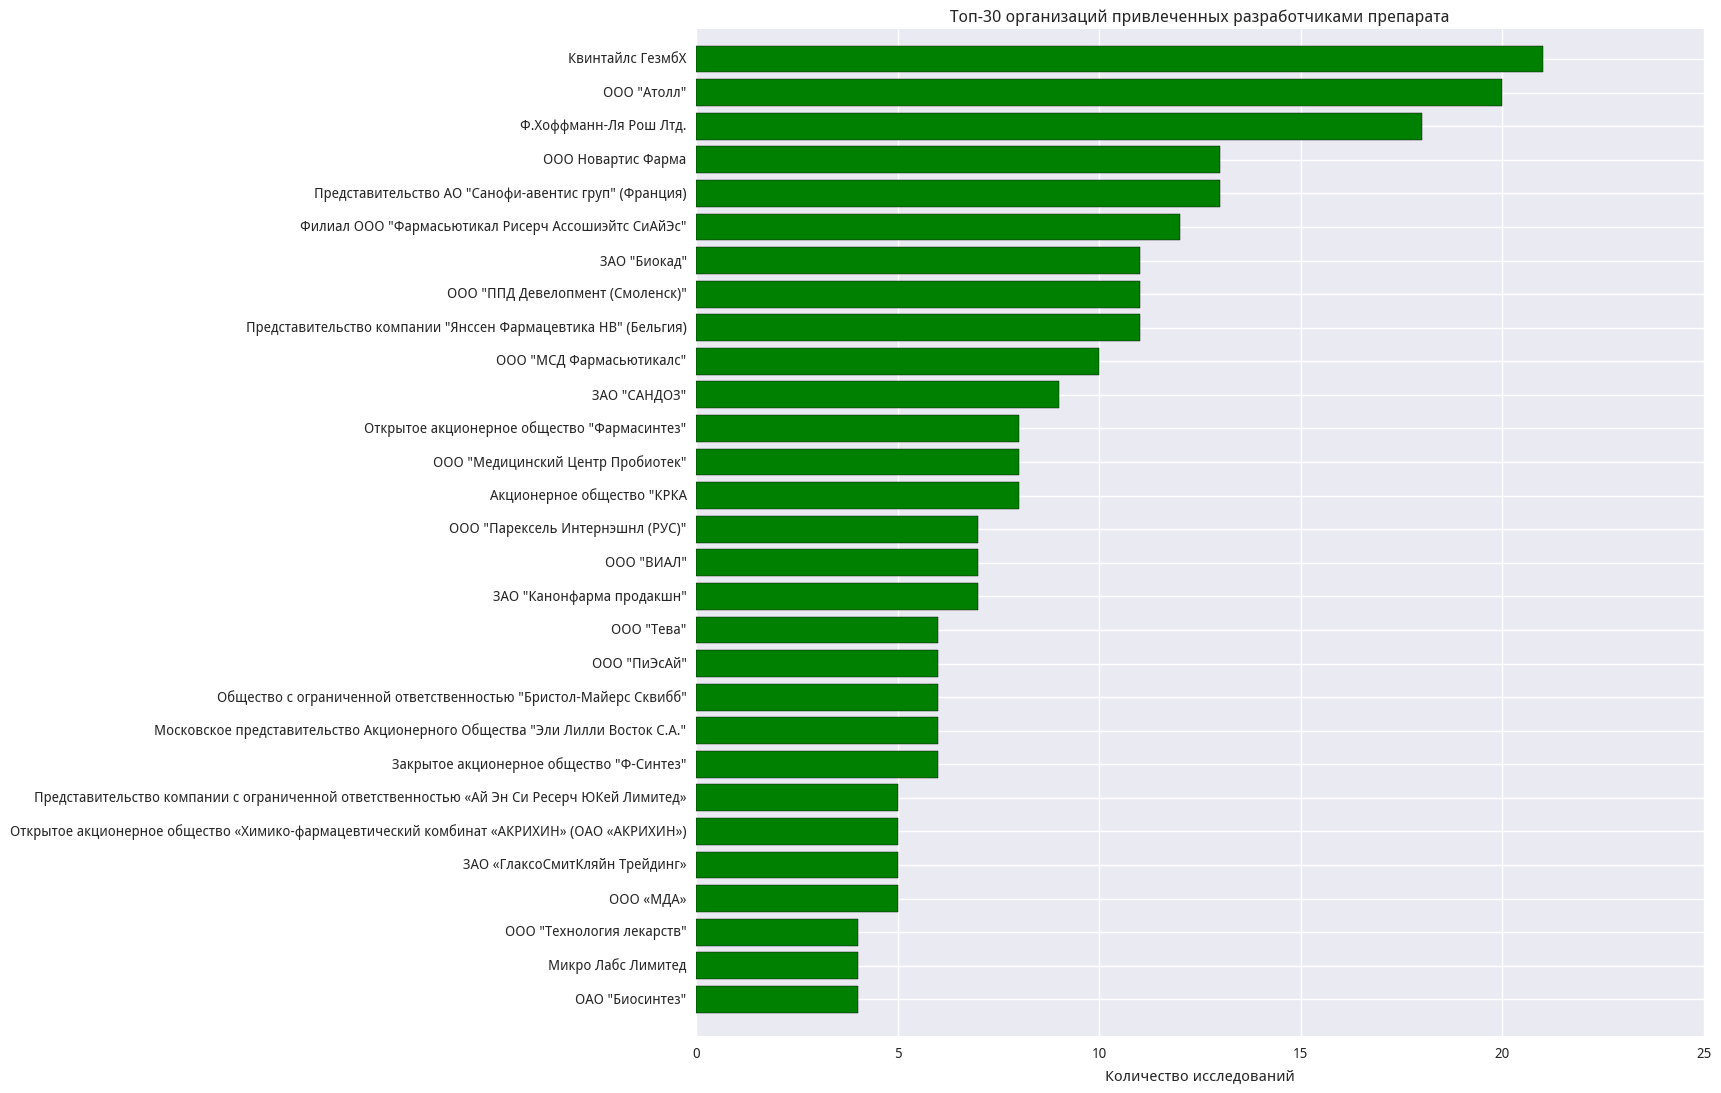

In [91]:
fig, ax = plt.subplots()
ind=np.arange(29)
ax.barh(ind, data.nms_attractedorg.value_counts()[0:29],  color='g')
ax.set_xlabel('Количество исследований')
ax.set_title('Топ-30 организаций привлеченных разработчиками препарата')
ax.set_yticks(ind+0.4 )
ax.set_yticklabels(data.nms_attractedorg.value_counts()[0:29].index)
ax.set_ylim( 29.5,-0.5)



(37.5, -0.5)

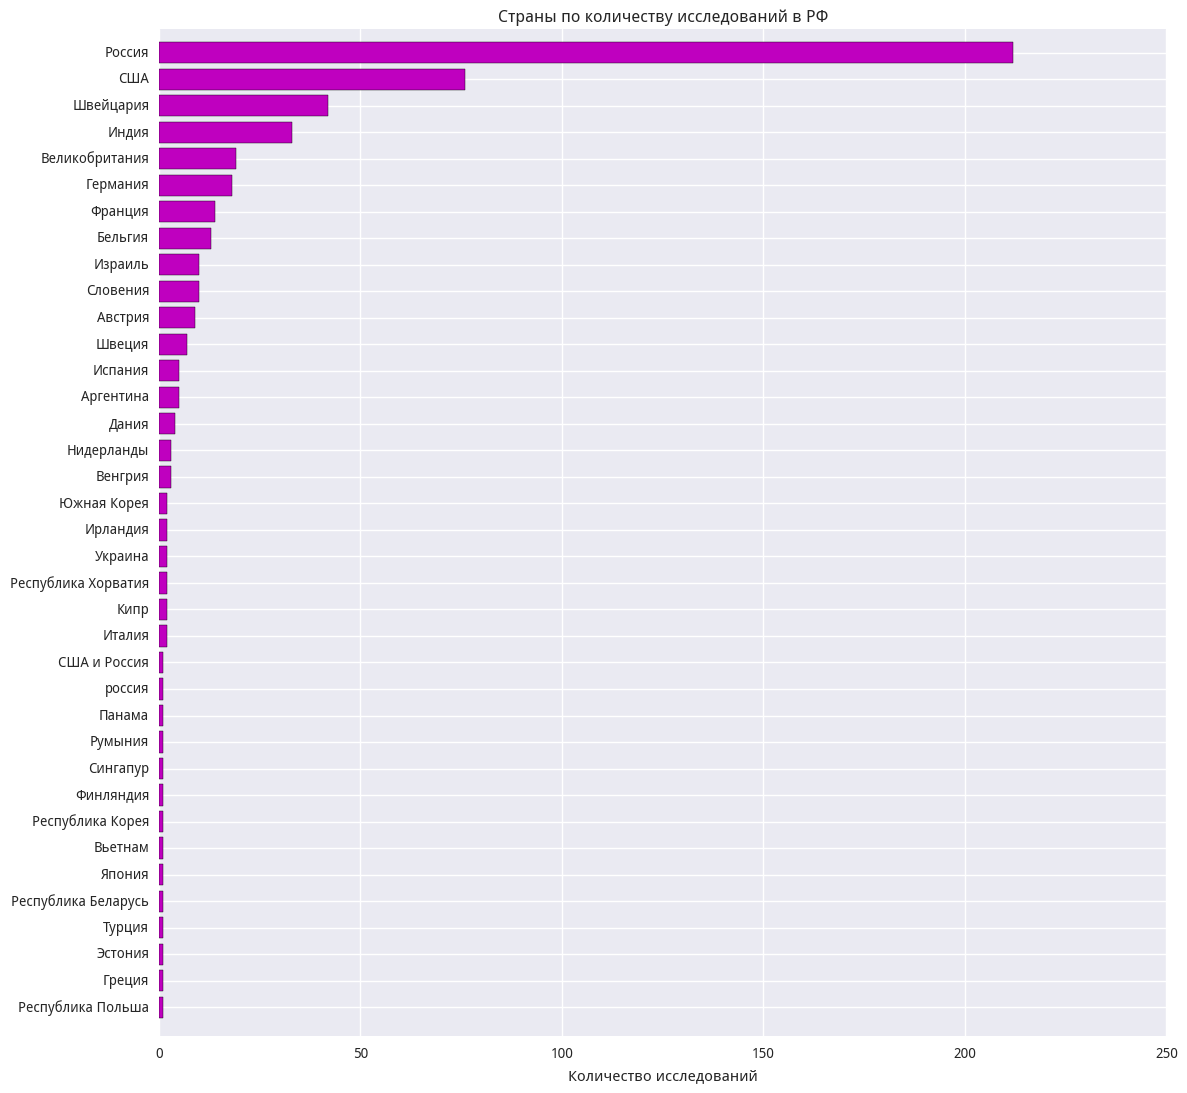

In [92]:
fig, ax = plt.subplots()
ind=np.arange(37)
ax.barh(ind, data.country.value_counts(),  color='m')
ax.set_xlabel('Количество исследований')
ax.set_title('Страны по количеству исследований в РФ')
ax.set_yticks(ind+0.4 )
ax.set_yticklabels(data.country.value_counts().index)
ax.set_ylim( 37.5,-0.5)

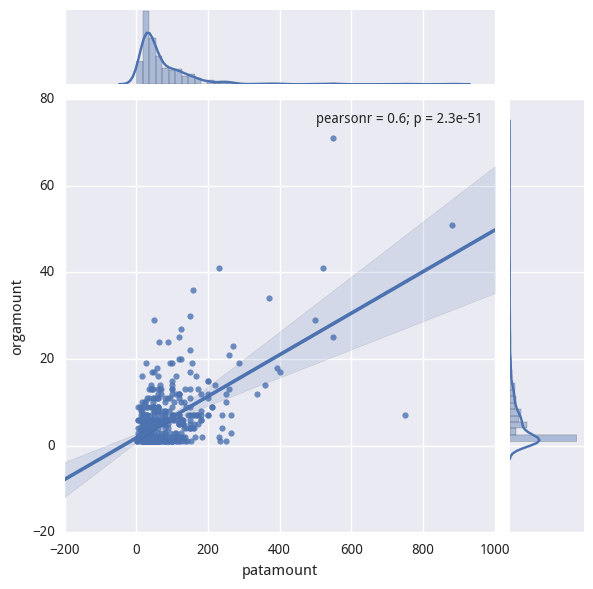

In [93]:
sns.jointplot(x='patamount', y='orgamount', data=data,kind="reg")

In [94]:
data_pat=data.sort_values(by='patamount', ascending=False)
data_res=data.sort_values(by='orgamount', ascending=False)
drop_col=['date', 'number','startdate', 'enddate', 'protocolnumber', 'phase', 'type', 'status', 'attractedorg']
data_pat.drop(drop_col,1, inplace=True)
data_res.drop(drop_col,1, inplace=True)


In [95]:
print('Топ-7 по максимальному количеству испытуемых')
data_pat.head(7)

Топ-7 по максимальному количеству испытуемых


,drugname,orgname,country,orgamount,patamount,areas,nms_attractedorg
410,Тиотропиум + Олодатерол комбинация фиксированн...,Берингер Ингельхайм РЦВ ГмбХ и Ко КГ/Boehringe...,Австрия,51,882,Пульмонология;,"ООО""Докумедс"" (Латвия)"
346,Пневмоксил 13 (Вакцина пневмококковая полисаха...,"ОАО ""Биомед"" им. И.И. Мечникова",Россия,7,750,Педиатрия; Иммунопрофилактика ;,"ОАО ""Биомед"" им. И.И. Мечникова"
269,S 05153 (Аторвастатин/Амлодипин/Периндоприл),"АО ""Лаборатории Сервье""",Франция,25,550,Кардиология;,"Представительство АО ""Лаборатории Сервье"""
508,Симбикорт® Турбухалер® (будесонид+формотерол),АстраЗенека АБ,Швеция,71,550,Пульмонология;,"ООО ""АстраЗенека Фармасьютикалз"""
413,Албиглутид (GSK716155),«ГлаксоСмитКляйн Рисерч энд Дивелопмент Лимите...,Великобритания,41,520,Кардиология; Общая практика; ТЕРАПИЯ (ОБЩАЯ); ...,ЗАО «ГлаксоСмитКляйн Трейдинг»
412,"Ривароксабан (JNJ-39039039, BAY 59-7939, Ксаре...",Янссен-Силаг Интернешнл НВ,Бельгия,29,500,Кардиология;,"Представительство компании ""Янссен Фармацевтик..."
155,Гликопиррония бромид (NVA237),Novartis Pharma AG / Новартис Фарма АГ,Швейцария,17,400,Пульмонология;,"ООО ""ППД Девелопмент (Смоленск)"""


In [96]:
print('Топ-7 по минимальному количеству испытуемых')
data_pat.tail(7)

Топ-7 по минимальному количеству испытуемых


,drugname,orgname,country,orgamount,patamount,areas,nms_attractedorg
397,Дабигатрана этексилат (BIBR 1048 MS),Берингер Ингельхайм РЦВ ГмбХ и Ко КГ/Boehringe...,Австрия,6,5,Педиатрия;,"ООО""Докумедс"" (Латвия)"
365,копанлисиб (BAY 80-6946),Байер ХэлсКэр АГ,Германия,9,5,Онкология; Гематология;,"ЗАО ""Байер"""
243,"rVIIa-FP (CSL689, Рекомбинантный химерный бело...",СиЭсЭл Беринг ГмбХ,Германия,2,4,Гематология; Хирургия;,Представительство компании с ограниченной отве...
187,Экулизумаб (Солирис®),"«Алексион Фармасьютикалс, Инк»",США,4,4,Неврология;,Квинтайлс ГезмбХ
319,GZ/SAR402671,Джензайм,США,1,2,Гематология;,"Представительство АО ""Санофи-авентис груп"" (Фр..."
140,"Онартузумаб (MetMAb, RO5490258)",F. Hoffmann-La Roche Ltd. / Ф.Хоффманн-Ля Рош ...,Швейцария,1,1,Онкология;,"ООО ""ППД Девелопмент (Смоленск)"""
502,Октафибрин (Октафибрин),Октафарма АГ,Швейцария,1,1,Гематология;,"ООО ""АР-СИ-ТИ-ГЛОБАЛ"""


In [97]:
print('Топ-7 по максимальному количеству исследователей')
data_res.head(7)

Топ-7 по максимальному количеству исследователей


,drugname,orgname,country,orgamount,patamount,areas,nms_attractedorg
508,Симбикорт® Турбухалер® (будесонид+формотерол),АстраЗенека АБ,Швеция,71,550,Пульмонология;,"ООО ""АстраЗенека Фармасьютикалз"""
410,Тиотропиум + Олодатерол комбинация фиксированн...,Берингер Ингельхайм РЦВ ГмбХ и Ко КГ/Boehringe...,Австрия,51,882,Пульмонология;,"ООО""Докумедс"" (Латвия)"
413,Албиглутид (GSK716155),«ГлаксоСмитКляйн Рисерч энд Дивелопмент Лимите...,Великобритания,41,520,Кардиология; Общая практика; ТЕРАПИЯ (ОБЩАЯ); ...,ЗАО «ГлаксоСмитКляйн Трейдинг»
88,Палоносетрон,«Хелсинн Хелскеа СА»,Швейцария,41,232,Химиотерапия; Онкология;,"ООО ""ПиЭсАй"""
472,Ацеллбия® (Ритуксимаб),"ЗАО ""Биокад""",Россия,36,159,Ревматология; ТЕРАПИЯ (ОБЩАЯ);,"ЗАО ""Биокад"""
178,Понесимод (ACT-128800),«Актелион Фармасьютикалз Лимитед»,Швейцария,34,370,Неврология;,"ООО ""ПиЭсАй"""
294,Апагин (Генериумаб),Общество с ограниченной ответственностью «Межд...,Россия,30,150,Онкология;,Общество с ограниченной ответственностью «Смуз...


In [98]:
print('Топ-7 по минимальному количеству исследователей')
data_res.tail(7)

Топ-7 по минимальному количеству исследователей


,drugname,orgname,country,orgamount,patamount,areas,nms_attractedorg
312,Эплеренон-Тева (Эплеренон),Тева Фармацевтические предприятия Лтд.,Израиль,1,42,Кардиология;,"ООО ""Тева"""
313,Тенофовир+Эмтрицитабин ВМ,"ООО ""Вириом""",Россия,1,24,Инфекционные болезни ;,ООО «Вириом»
315,Нейромультивит,"ООО ""ВАЛЕАНТ""",Россия,1,100,Неврология;,"ООО ""ВАЛЕАНТ"""
80,Кеторолак,"ОАО ""Мосхимфармпрепараты"" им. Н.А. Семашко",Россия,1,42,ТЕРАПИЯ (ОБЩАЯ);,"ООО ""ФармЭрудит"""
318,МОДЭЛЛЬ® 911 (Левоноргестрел),Тева Фармацевтические предприятия Лтд.,Израиль,1,60,Акушерство и гинекология ;,"ООО ""Тева"""
319,GZ/SAR402671,Джензайм,США,1,2,Гематология;,"Представительство АО ""Санофи-авентис груп"" (Фр..."
0,Леналидомид,Лаборатория Тютор С.А.С.И.Ф.И.А,Аргентина,1,26,Онкология;,"ООО ""РегЭксперт"""


In [100]:
len(pd.unique(data.drugname))

468

In [101]:
len(data.drugname)

509